# Homework #3

### SVM

#### 1.

In [5]:
import numpy as np
import pandas

spam_csv = "spam.csv"
cancer_csv = "cancer.csv"
blobs2_csv = "blobs2.csv"
smsspam_csv = "smsspam.csv"

class_label = "label"

def get_dataset(filename):
    dataset = pandas.read_csv(filename)
    x = dataset.drop(class_label, 1)
    y = dataset[class_label]
    return x, y

In [60]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision(x, y, classifier, title, resolution=0.02):
    plt.rcParams['figure.figsize'] = [10, 7]

    colors = ('darkviolet', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])        
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    classes = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    classes = classes.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, classes, alpha=0.4, cmap=cmap)
    
    for elem_x, elem_y in zip(x, y):
        if elem_y == 0:
            plt.scatter(elem_x[0], elem_x[1], s=40, color=colors[0])
        else:
            plt.scatter(elem_x[0], elem_x[1], s = 40, color=colors[1])
            
    plt.scatter(x[:, 0][classifier.support_], x[:, 1][classifier.support_], c=y[classifier.support_], cmap=cmap, s=40, edgecolors='black')
    
    plt.title(title)
    
    plt.show()

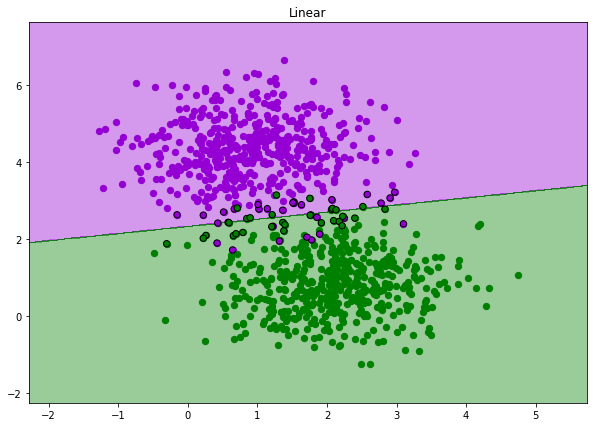

In [61]:
from sklearn import svm

x, y = get_dataset(blobs2_csv)

classifier = svm.SVC(kernel='linear', gamma='scale').fit(x, y)
plot_decision(x.values, y.values, classifier, "Linear")

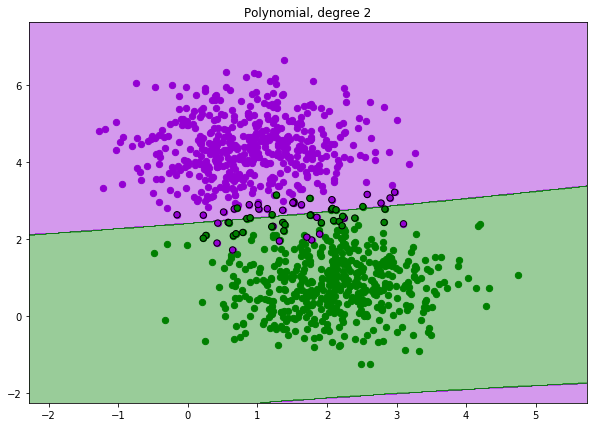

In [62]:
classifier = svm.SVC(kernel='poly', degree=2, gamma='scale').fit(x, y)
plot_decision(x.values, y.values, classifier, "Polynomial, degree 2")

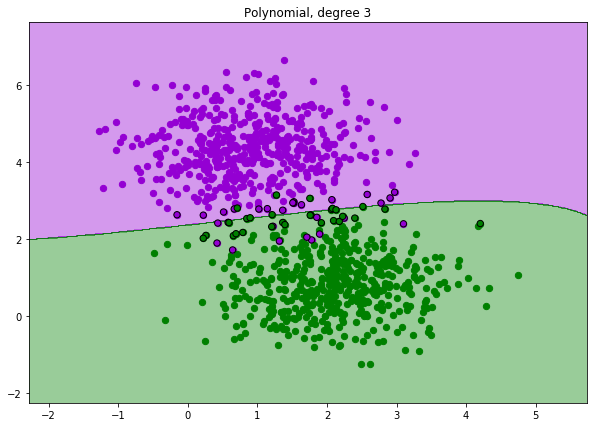

In [63]:
classifier = svm.SVC(kernel='poly', degree=3, gamma='scale').fit(x, y)
plot_decision(x.values, y.values, classifier, "Polynomial, degree 3")

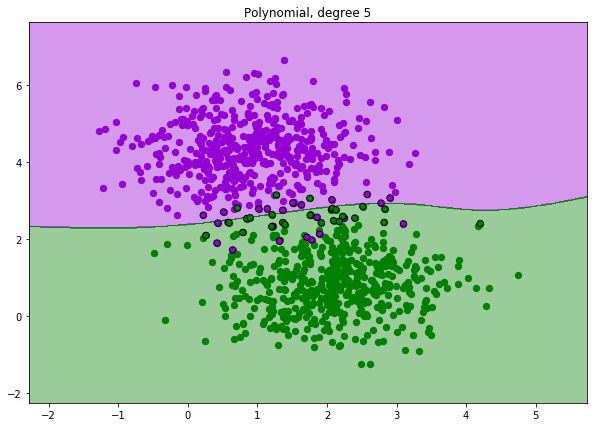

In [64]:
classifier = svm.SVC(kernel='poly', degree=5, gamma='scale').fit(x, y)
plot_decision(x.values, y.values, classifier, "Polynomial, degree 5")

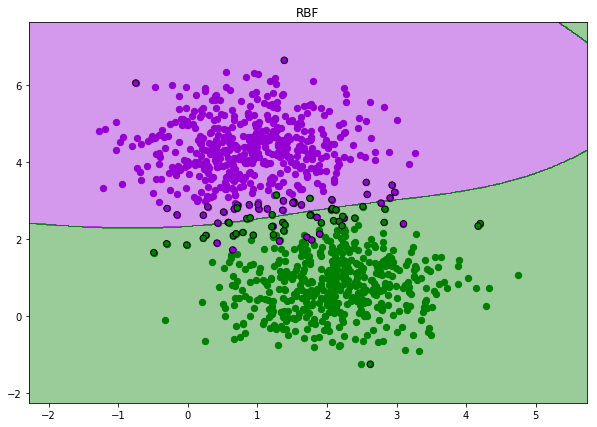

In [65]:
classifier = svm.SVC(kernel='rbf', gamma='scale').fit(x, y)
plot_decision(x.values, y.values, classifier, "RBF")

#### 2.

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

np.random.seed(31415)

In [103]:
def func_duration(func):
    start = time.process_time()
    func()
    return time.process_time() - start

In [112]:
x, y = get_dataset(cancer_csv)
print("cancer.csv dataset:")

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2)

svm_classifier = svm.SVC(kernel='linear', random_state=30, C=0.1)
t = func_duration(lambda : svm_classifier.fit(x_train, y_train))
acc = svm_classifier.score(x_val, y_val)
print("Time for SVM (linear, C=0.1)=" + str(t) + " with accuracy=" + str(acc))

svm_classifier2 = svm.SVC(kernel='linear', random_state=30, C=0.5)
t = func_duration(lambda : svm_classifier2.fit(x_train, y_train))
acc = svm_classifier2.score(x_val, y_val)
print("Time for SVM (linear, C=0.5)=" + str(t) + " with accuracy=" + str(acc))

svm_classifier3 = svm.SVC(kernel='linear', random_state=30, C=1)
t = func_duration(lambda : svm_classifier3.fit(x_train, y_train))
acc = svm_classifier3.score(x_val, y_val)
print("Time for SVM (linear, C=1)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=30)
t = func_duration(lambda : rf_classifier.fit(x_train, y_train))
acc = rf_classifier.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=5)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier2 = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=30)
t = func_duration(lambda : rf_classifier2.fit(x_train, y_train))
acc = rf_classifier2.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=7)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier3 = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=30)
t = func_duration(lambda : rf_classifier3.fit(x_train, y_train))
acc = rf_classifier3.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=10)=" + str(t) + " with accuracy=" + str(acc))

cancer.csv dataset:
Time for SVM (linear, C=0.1)=0.20987299999998754 with accuracy=0.9473684210526315
Time for SVM (linear, C=0.5)=1.1603920000000016 with accuracy=0.956140350877193
Time for SVM (linear, C=1)=0.7628699999999924 with accuracy=0.956140350877193
Time for Random Forest (n=10, depth=5)=0.011995999999982132 with accuracy=0.956140350877193
Time for Random Forest (n=10, depth=7)=0.011819000000002688 with accuracy=0.9649122807017544
Time for Random Forest (n=10, depth=10)=0.012027000000017551 with accuracy=0.9649122807017544


SVN (even when we vary the parameters) is slower by 1-2 orders of magnitude than Random Forest.

In [113]:
x, y = get_dataset(spam_csv)
print("spam.csv dataset:")

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2)

svm_classifier = svm.SVC(kernel='linear', random_state=30, C=0.1)
t = func_duration(lambda : svm_classifier.fit(x_train, y_train))
acc = svm_classifier.score(x_val, y_val)
print("Time for SVM (linear, C=0.1)=" + str(t) + " with accuracy=" + str(acc))

svm_classifier2 = svm.SVC(kernel='linear', random_state=30, C=0.5)
t = func_duration(lambda : svm_classifier2.fit(x_train, y_train))
acc = svm_classifier2.score(x_val, y_val)
print("Time for SVM (linear, C=0.5)=" + str(t) + " with accuracy=" + str(acc))

svm_classifier3 = svm.SVC(kernel='linear', random_state=30, C=1)
t = func_duration(lambda : svm_classifier3.fit(x_train, y_train))
acc = svm_classifier3.score(x_val, y_val)
print("Time for SVM (linear, C=1)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=30)
t = func_duration(lambda : rf_classifier.fit(x_train, y_train))
acc = rf_classifier.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=5)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier2 = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=30)
t = func_duration(lambda : rf_classifier2.fit(x_train, y_train))
acc = rf_classifier2.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=7)=" + str(t) + " with accuracy=" + str(acc))

rf_classifier3 = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=30)
t = func_duration(lambda : rf_classifier3.fit(x_train, y_train))
acc = rf_classifier3.score(x_val, y_val)
print("Time for Random Forest (n=10, depth=10)=" + str(t) + " with accuracy=" + str(acc))

spam.csv dataset:
Time for SVM (linear, C=0.1)=77.026277 with accuracy=0.9163952225841476
Time for SVM (linear, C=0.5)=86.19158199999998 with accuracy=0.9239956568946797
Time for SVM (linear, C=1)=367.51989699999996 with accuracy=0.9261672095548317
Time for Random Forest (n=10, depth=5)=0.0393500000000131 with accuracy=0.8990228013029316
Time for Random Forest (n=10, depth=7)=0.035482999999999265 with accuracy=0.9196525515743756
Time for Random Forest (n=10, depth=10)=0.04533100000003287 with accuracy=0.9250814332247557


SVN is again slower by than Random Forest. This was expected, since for large datasets, the SVN works slower due to the large number of calculations of the scalar product.

### Bayesian Classifier

#### 3.

In [261]:
from sklearn import metrics 

plt.rcParams['figure.figsize'] = [6, 4]

def draw_roc(y, p, pos_label, title):
    fpr, tpr, _ = metrics.roc_curve(y, p, pos_label=pos_label)
    plt.plot(fpr, tpr)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    
    plt.title(title)
    plt.show()

In [317]:
class NaiveBayesClassifierGaussian:
    classes = []
    prob_classes = []
    probs = []
    num_classes = None
    num_features = None

    def fit(self, x, y):
        self.classes, counts = np.unique(y, return_counts=True)
        self.prob_classes = counts / len(y)
        self.num_classes = len(self.classes)
        self.num_features = x.shape[1]
        self.probs = np.zeros((self.num_classes, 2, self.num_features))
        
        for i in range(self.num_classes):
            label = self.classes[i]
            x_label = x[y == label]
            
            self.probs[i] = (np.mean(x_label, axis=0), np.var(x_label, axis=0))
        
    def predict(self, x):
        n = x.shape[0]
        cur_probs = np.empty((n, self.num_classes))
        ans_probs = np.empty((n, self.num_classes))
        
        for i in range(self.num_classes):
            ps = np.zeros((n, self.num_features))

            for j in range(n):
                for k in range(self.num_features):
                    x_arg = x[j][k]
                    loc = self.probs[i][0][k]
                    scale = np.sqrt(self.probs[i][1][k])
                    
                    y = (x_arg - loc) / scale
                    f = np.exp(- y ** 2 / 2) / np.sqrt(2 * np.pi)
                    
                    ps[j][k] = f / scale
                                
            for q in range(n):
                cur_probs[q, i] = self.prob_classes[i] * np.prod(ps[q])
            
        for i in range(len(cur_probs)):
            ans_probs[i] = 0.5 if np.sum(cur_probs[i]) == 0 else cur_probs[i] / np.sum(cur_probs[i])
            
        return ans_probs    

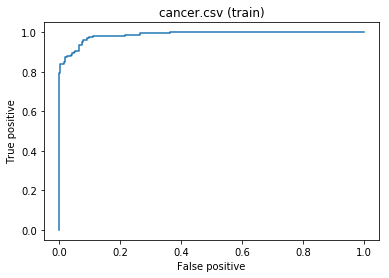

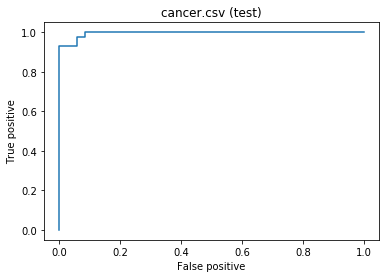

In [318]:
x, y = get_dataset(cancer_csv)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
gauss_classifier = NaiveBayesClassifierGaussian()

gauss_classifier.fit(x_train.values, y_train.values)

draw_roc(y_train.values, gauss_classifier.predict(x_train.values)[:, 1], 'M', "cancer.csv (train)")
draw_roc(y_test.values, gauss_classifier.predict(x_test.values)[:, 1], 'M', "cancer.csv (test)")

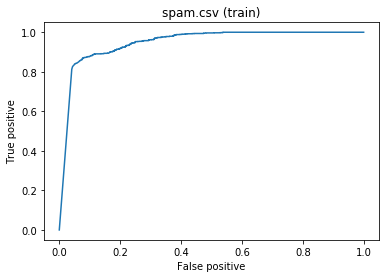

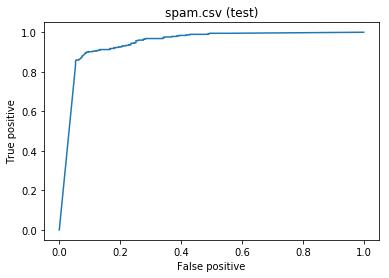

In [320]:
x, y = get_dataset(spam_csv)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
gauss_classifier = NaiveBayesClassifierGaussian()

gauss_classifier.fit(x_train.values, y_train.values)

draw_roc(y_train.values, gauss_classifier.predict(x_train.values)[:, 1], 1, "spam.csv (train)")
draw_roc(y_test.values, gauss_classifier.predict(x_test.values)[:, 1], 1, "spam.csv (test)")